![WeTheGeeksV3.jpg](https://raw.githubusercontent.com/ptsireunion/CPGE-PT-Reunion/main/WeTheGeeksV3.jpg)
 
<div class="alert alert-block alert-info">
    <b> PYTHON – 
</div>

# - Propagation d'une onde dans le vide - Equation de d'Alembert
> Physique Chimie `CPGE PT` lien vers le blog <a> https://cpge-reunion-ptsi.blogspot.com/p/info-pyhton.html </a>
    >> Sujet inspiré par diverses lectures. Un grand merci à leurs contributeurs.trices

Dans ce notebook, on cherchera à `discrétiser l’équation de D'Alembert, la résoudre numériquement et calculer l'évolution de l'onde sur un intervalle de temps de 20s.`

# Hypothèses
Pour simplifier les écritures et rendre plus lisibles les résultats:
>le domaine étudié aura une longueur de $L=50~\text{m}$, 
>
>la longueur d'onde choisie est $\lambda_0=1~\text{m}$, 
>
>la célérité des ondes sera $c=1~\text{m.s}^{-1}$
>
>la pulsation est notée $\omega_0$.

# Conditions aux limites
>On calculera l'évolution de l'onde sur un intervalle de temps `duree` de $20~\text{s}$ qui doit permettre à l'onde d'approcher des bordures sans les atteindre. 
>
>On utilisera des conditions aux limites dites "de réflexion totale", plus simples à implémenter, en fixant la valeur de $E(x=0)=E(x=L)=0$.


# Conditions initiales : forme d'onde simple, fenêtre de Hann
>Pour se rapprocher de la réalité, on choisit d'étudier un onde non purement sinusoïdale. Pour créer une forme d'onde simple on définit une fonction `Hann` qui calcule une fenêtre de Hann de largeur $H$, centrée sur un point $x_0$.
Pour vous renseigner sur cette fonction, rendez-vous à l'adresse suivante <a> https://fr.wikipedia.org/wiki/Fen%C3%AAtrage </a>
On verra plus loin comment la générer.
On choisira une position initiale de l'onde en $x_0=\frac{L}{2}$


# Etude théorique

> **Question 1**
>
> Démontrer l’équation de D'Alembert à une dimension en cartésien dans le vide à l'aide des équations de Maxwell : $$\dfrac{\partial^2 E}{\partial t^2}=c^2\dfrac{\partial^2E}{\partial x^2}$$

>**Question 2** 
> On appelle $\sigma=\frac{1}{\lambda}$ le nombre d'onde. Exprimer $\omega_0$ en fonction de $\sigma$, $\lambda$ et $c$. Calculer sa valeur  


## Etude numérique : Discrétisation de l'équation de Laplace
On ne travaillera pas avec une matrice `E[i,j]` avec i associé à x et j à t.  On choisit de faire les calculs en fonction du temps et de la position séparément. On calculera d'abord le Laplacien pour ensuite l'injecter dans l'équation d'onde.

>**Question 3** 
>> 3.1) Soit une fonction $f$. En écrivant la formule de Taylor à l’ordre 2 pour $f(x+dx)$ et $f(x-dx)$, démontrer que : 
> $$ f''(x)\simeq\frac{f(x+dx)+f(x-dx)-2f(x)}{dx^2}$$
>
>> 3.2)
> En déduire l'approximation de $\left(\frac{\partial^2 E}{\partial x^2}\right)_{t}$ en fonction de `E[i+1]`, de `E[i]` et de `E[i-1]` et du pas spatial `delta_x`.
>
>> 3.3)
> Appliquer la même méthode pour la dérivée seconde suivant la variable t et en déduire l'approximation de $\left(\frac{\partial^2 E}{\partial t^2}\right)_{x}$ en fonction de `E_new`, de `E` et de `E_old` et du pas temporel `delta_t`.
>
>> 3.4)
> On appelle `d2Ex` le Laplacien unidimensionel. Déduire des questions précédentes la résolution itérative qui sera implémentée à chaque instant $t_k$ dans l'algorithme :
`E_new = 2*E - E_old + ((c*delta_t)**2)*d2Ex`

## Déclaration des variables numériques
Import des librairies

In [8]:
#On ajoute la ligne %matplotlib inline qui permettra d'afficher les graphiques directement dans le notebook.
%matplotlib inline

# import des librairies 
import numpy as np
from scipy.integrate import odeint
from scipy import fft
import matplotlib.pyplot as plt

Déclaration des constantes

In [9]:
# Domaine de calcul
L = 50 # longueur
duree = 20

# Onde
E_amp = 1 # amplitude
lambda0 = 1 # longueur d'onde
sigma0 = 1 / lambda0 # nombre d'onde
c = 1 # célérité 
omega0=2*np.pi*sigma0*c # pulsation associée à la longueur d'onde

Les variables numériques spatiales, nombre de points et pas d'espace sont `Num_x` et `delta_x`, tandis que les variables temporelles sont `Num_t` et `delta_t`.

In [10]:
# Intégration spatiale
Num_x = 5001 # points de calcul
x=np.linspace(0,L,Num_x) # vecteur position
delta_x = x[1]-x[0] # intervalle spatial d'intégration


# Intégration temporelle
Num_t = 10001 # points de calcul
t=np.linspace(0,L/(c),Num_t) # vecteur temps
delta_t = t[1]-t[0] # intervalle temporel d'intégration

## Génération de la fenêtre de Hann

In [11]:
x0=L/2 # position initiale de la forme d'onde

## Fenêtre de définition de la forme d'onde
def Hann(x,x0,H):
    func=np.zeros(len(x))
    for i in range(len(x)):
        if abs(x[i]-x0)<H/2:
            func[i]=.5*(1-np.cos(2*np.pi*(x[i]-x0+H/2)/H))
    return func

## Forme d'onde à l'instant t, t-dt et t+dt
E0  = E_amp*Hann(x,x0,lambda0)
E0_old  = E_amp*Hann(x,x0-c*delta_t,lambda0)
E0_new  = E_amp*Hann(x,x0+c*delta_t,lambda0)

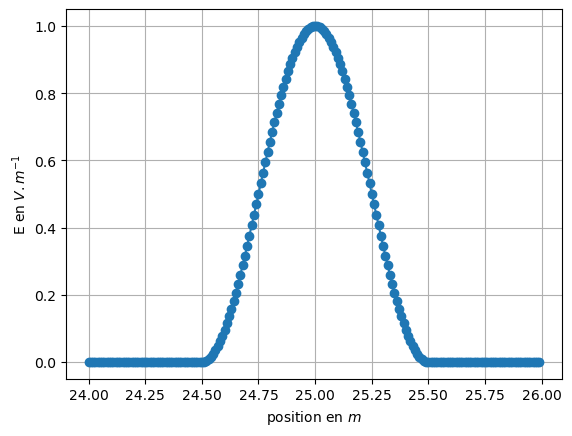

In [13]:
# Tracé de la forme d'onde avec zoom sur la partie centrale du domaine de calcul
plt.figure()
Nx=int(lambda0//delta_x)
plt.plot(x[int(2.4*Num_x//5):int(2.6*Num_x//5)],E0[int(2.4*Num_x//5):int(2.6*Num_x//5)],'-o')
plt.xlabel(r"position en $m$")
plt.ylabel(r"E en $V.m^{-1}$")
plt.grid(True)
plt.show()

# Ecriture de l'algorithme 

In [15]:
# On suppose la forme d'onde présente pour tout t<0 et immobile
E=E0
E_old=E0
E_new=E0
d2Ex=np.zeros(Num_x) # initialisation du laplacien de E qui sera calculé plus loin

E_store=[] # liste dans laquelle on stocke quelques formes d'onde intermédiaires
time_store=[] # liste dans laquelle on stocke les instants correspondants

k, time = 0,0
while time < duree : 
    for i in range(Num_x-1):
        d2Ex[i] = (E[i+1]+E[i-1]-2*E[i])/delta_x**2

    E_new = 2*E - E_old + ((c*delta_t)**2)*d2Ex
    E_old, E = E, E_new
    if k%(duree/(5*delta_t)) == 0 :
        E_store.append(E)
        time_store.append(time)
    k += 1
    time += delta_t

tracés pour les 5 premiers pas temporels, t=0 compris

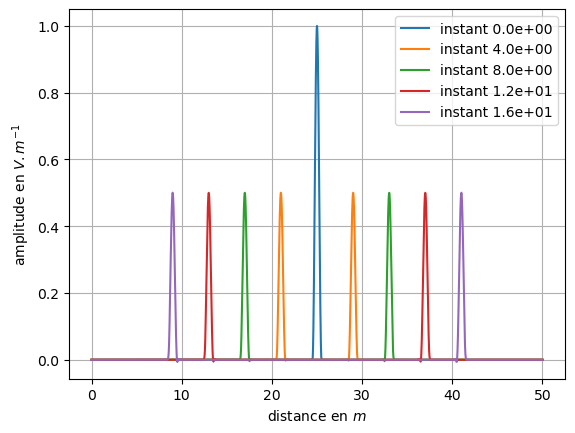

In [16]:
plt.figure()
plt.grid(True)
for i in range(len(E_store)) :
    plt.plot(x,E_store[i], label="instant "+str(format(time_store[i], "#.1e")))
plt.xlabel(r"distance en $m$")
plt.ylabel(r"amplitude en $V.m^{-1}$")
plt.legend()
plt.show()

# Conclusion
> La forme d'onde se scinde en deux, l'une se propageant dans le sens des $x$ croissants et l'autre dans l'autre sens. Les deux se propagent à la même vitesse que l'on peut calculer et comparer à celle attendue.
 
> **Question 4**  : A l'aide de la courbe précédente, retrouver l'ordre de grandeur de la célérité $c$ de l'onde


On va utiliser le calcul numérique pour être plus précus : on relève la coordonnée du maximum de l'onde rétrograde finale, on lui retranche celle de l'onde initiale et on divise par la durée de la simulation. Cette valeur est alors comparée à $c$.

In [9]:
# On ne prend pas en compte l'instant initial (distance nulle et division par 0)
pos = np.array([np.abs(x[np.argmax(abs(E0))]-x[np.argmax(abs(E_store[i]))]) for i in range(1,len(E_store))])
v_phi = np.array([pos[i]/((i+1)*duree/5) for i in range(len(pos))])

v_phi_moy=np.mean(v_phi)
v_phi_u=np.std(v_phi, ddof=1)
print("La vitesse de propagation moyenne de l'onde simulée est de ",format(v_phi_moy,"#.3e"),"m/s")
print("L'écart-type de la vitesse de propagation de l'onde simulée est de ",format(v_phi_u,"#.3e"),"m/s")

La vitesse de propagation moyenne de l'onde simulée est de  1.001e+00 m/s
L'écart-type de la vitesse de propagation de l'onde simulée est de  8.398e-04 m/s


Le résultat obtenu est celui qu'on attendait.

### Forme d'onde plus complexe : le paquet d'onde
On peut donc utiliser ce script pour étudier la propagation d'une onde plus complexe sur une plus grande distance.

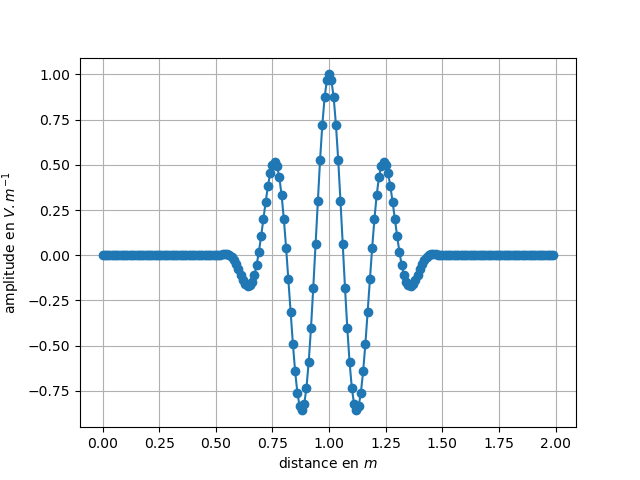

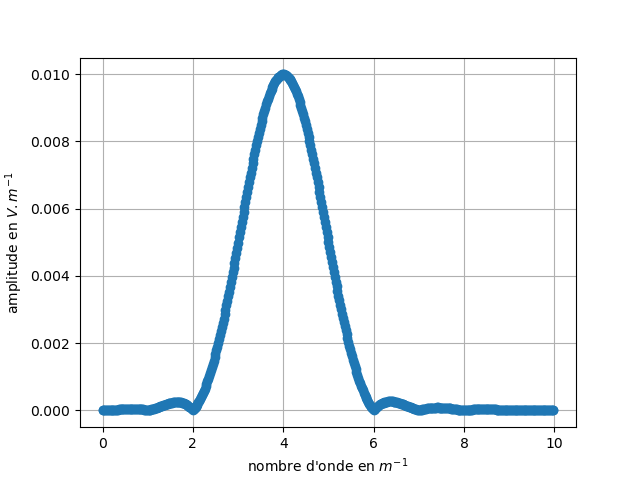

In [11]:
## Forme d'onde à l'instant t, t-dt et t+dt
x0=L/50

E0 = E_amp*Hann(x,x0,lambda0)*np.cos(2*np.pi*x*4/lambda0)
E0_old  = E_amp*Hann(x,x0-c*delta_t,lambda0)*np.cos(2*np.pi*(x+c*delta_t)*4/lambda0)
E0_new  = E_amp*Hann(x,x0+c*delta_t,lambda0)*np.cos(2*np.pi*(x-c*delta_t)*4/lambda0)

# Tracé de la forme d'onde
plt.figure()
Nx=int(lambda0//delta_x)
plt.plot(x[:Num_x//25],E0[:Num_x//25],'-o')
plt.xlabel(r"distance en $m$")
plt.ylabel(r"amplitude en $V.m^{-1}$")
plt.grid(True)
plt.show()

# Spectre spatial du signal
y = np.fft.rfft(E0/(len(E0)//2+1))
freq = np.array([i/np.max(x) for i in range(len(y))])

plt.figure()
# le spectre affiché est tronqué pour mieux les fréquences utiles
plt.plot(freq[:int(Num_x//10)],np.abs(y)[:int(Num_x//10)],'-o')
plt.xlabel(r"nombre d'onde en $m^{-1}$")
plt.ylabel(r"amplitude en $V.m^{-1}$")
plt.grid(True)
plt.show()

In [12]:
##################################
### PAQUET D'ONDE DANS LE VIDE ###
##################################

# Intégration temporelle, replacée ici pour pouvoir modifier à loisir Num_t sans conséquences pour la suite
Num_t = 10001 # points de calcul
t=np.linspace(0,L/(c),Num_t) # vecteur temps
delta_t = t[1]-t[0] # intervalle temporel d'intégration

## Forme d'onde à l'instant t, t-dt et t+dt
x0=L/50

E = E_amp*Hann(x,x0,lambda0)*np.cos(2*np.pi*x*4/lambda0)
E_old  = E_amp*Hann(x,x0-c*delta_t,lambda0)*np.cos(2*np.pi*(x+c*delta_t)*4/lambda0)
E_new  = E_amp*Hann(x,x0+c*delta_t,lambda0)*np.cos(2*np.pi*(x-c*delta_t)*4/lambda0)

E_store=[] # liste dans laquelle on stocke quelques formes d'onde intermédiaires
time_store=[] # liste dans laquelle on stocke les instants correspondants

d2Ex=np.zeros(Num_x)

duree = 45
k, time = 0,0.
while time < duree : 
    for i in range(Num_x-1):
        if i==0 :
            d2Ex[i] = (E[i+1]+0-2*E[i])/delta_x**2
        elif i==1 or i==Num_x-2 :
            d2Ex[i] = (E[i+1]+E[i-1]-2*E[i])/delta_x**2
        elif i==Num_x-1:
            d2Ex[i] = (0+E[i-1]-2*E[i])/delta_x**2
        else :
            d2Ex[i] = (-1/12*E[i+2]+4/3*E[i+1]-5/2*E[i]+4/3*E[i-1]-1/12*E[i-2])/delta_x**2
    E_new = 2*E - E_old + ((c*delta_t)**2)*d2Ex
    E_old, E = E, E_new
    if k%(duree/(5*delta_t)) == 0 :
        E_store.append(E)
        time_store.append(time)
    k += 1
    time += delta_t

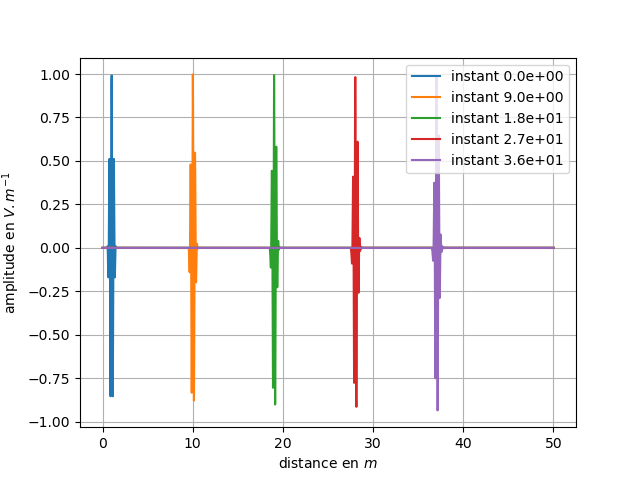

La vitesse de propagation moyenne de l'onde simulée est de  1.001e+00 m/s
L'écart-type de la vitesse de propagation de l'onde simulée est de  1.909e-04 m/s


In [13]:
plt.figure()
plt.grid(True)
for i in range(len(E_store)) :
    plt.plot(x,E_store[i], label="instant "+str(format(time_store[i], "#.1e")))
plt.xlabel(r"distance en $m$")
plt.ylabel(r"amplitude en $V.m^{-1}$")
plt.legend()
plt.show()

# On ne prend pas en compte l'instant initial (distance nulle et division par 0)
pos = np.array([np.abs(x[np.argmax(abs(E0))]-x[np.argmax(abs(E_store[i]))]) for i in range(1,len(E_store))])
v_phi = np.array([pos[i]/((i+1)*duree/5) for i in range(len(pos))])

v_phi_moy=np.mean(v_phi)
v_phi_u=np.std(v_phi, ddof=1)
print("La vitesse de propagation moyenne de l'onde simulée est de ",format(v_phi_moy,"#.3e"),"m/s")
print("L'écart-type de la vitesse de propagation de l'onde simulée est de ",format(v_phi_u,"#.3e"),"m/s")

La vitesse de propagation est à nouveau correctement évaluée mais un écart apparaît pour des pas de temps trop importants qui se confirme si on regarde de près la forme d'onde après propagation. 